In [78]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data3size20.csv")
y = df['class']

In [79]:
img_list = []
size = 16
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [90]:
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),3),to_categorical((np.array(y_val)),3),to_categorical((np.array(y_test)),3)

In [91]:
#モデルの設定
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 101,507
Trainable params: 101,507
Non-trainable params: 0
_________________________________________________________________


In [92]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
   optimizer = 'adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
                   callbacks=[tsb])

Epoch 1/20
256/256 [==============================] - 2s 6ms/step - loss: 0.8291 - accuracy: 0.6551 - val_loss: 0.6847 - val_accuracy: 0.7492
Epoch 2/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.7464 - val_loss: 0.6697 - val_accuracy: 0.7498
Epoch 3/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6640 - accuracy: 0.7542 - val_loss: 0.6544 - val_accuracy: 0.7589
Epoch 4/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6501 - accuracy: 0.7569 - val_loss: 0.6526 - val_accuracy: 0.7542
Epoch 5/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6443 - accuracy: 0.7613 - val_loss: 0.6429 - val_accuracy: 0.7597
Epoch 6/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6328 - accuracy: 0.7645 - val_loss: 0.6411 - val_accuracy: 0.7611
Epoch 7/20
256/256 [==============================] - 1s 6ms/step - loss: 0.6399 - accuracy: 0.7595 - val_loss: 0.6374 - val_accuracy: 0.7638
Epoch 

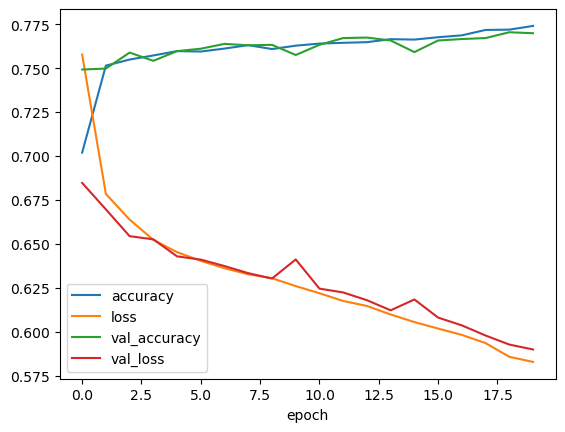

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [94]:
print(type(history))
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'tensorflow.python.keras.callbacks.History'>
Test loss: 0.5901636481285095
Test accuracy: 0.765600860118866
